## 7장 의사결정나무

### (1) 분류 예측 실습

- 변수 지정 및 전처리

In [1]:
#1. 모듈 및 함수 불러오기
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

#2. 데이터 불러오기
df = pd.read_csv('Ashopping.csv', encoding = 'cp949')

#3. 변수 지정(독립변수/종속변수)
X=df[['총매출액', '구매금액대', '할인권 사용 횟수', '총 할인 금액', '구매유형', '구매카테고리수', '성별', '거래기간','방문빈도', '할인민감여부']]
Y=df['이탈여부']

#4. 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#5. 오버 샘플링 
smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)


- 모형 학습 및 예측

In [2]:
#1. 모듈 및 함수 불러오기
from sklearn.tree import DecisionTreeClassifier

#2. 모형 생성
model = DecisionTreeClassifier(random_state=0, max_depth = 3)

#3. 모형 학습 및 예측
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print('평가용 데이터 세트에 대한 예측값\n:', Y_pred)

평가용 데이터 세트에 대한 예측값
: [0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0
 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0
 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1
 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1
 1 0 0 0]


- 모형 평가

In [3]:
print('학습용 데이터 세트 정확도: {:.3f}'.format(model.score(X_train, Y_train)))
print('평가용 데이터 세트 정확도: {:.3f}'.format(model.score(X_test, Y_test)))

학습용 데이터 세트 정확도: 0.849
평가용 데이터 세트 정확도: 0.817


In [4]:
#1. 모듈 및 함수 불러오기
from sklearn.metrics import classification_report

#2. 정밀도, 재현율, F1 스코어 출력
Y_pred=model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       219
           1       0.64      0.75      0.69        81

    accuracy                           0.82       300
   macro avg       0.77      0.80      0.78       300
weighted avg       0.83      0.82      0.82       300



- 변수 중요도 출력

In [5]:
feature_name = X.columns
feature_importances = model.feature_importances_
sorted(zip(feature_importances, feature_name), reverse=True)

[(0.9016870952751362, '거래기간'),
 (0.09813536640549, '방문빈도'),
 (0.00017753831937378827, '총 할인 금액'),
 (0.0, '할인민감여부'),
 (0.0, '할인권 사용 횟수'),
 (0.0, '총매출액'),
 (0.0, '성별'),
 (0.0, '구매카테고리수'),
 (0.0, '구매유형'),
 (0.0, '구매금액대')]

- 모형의 시각화

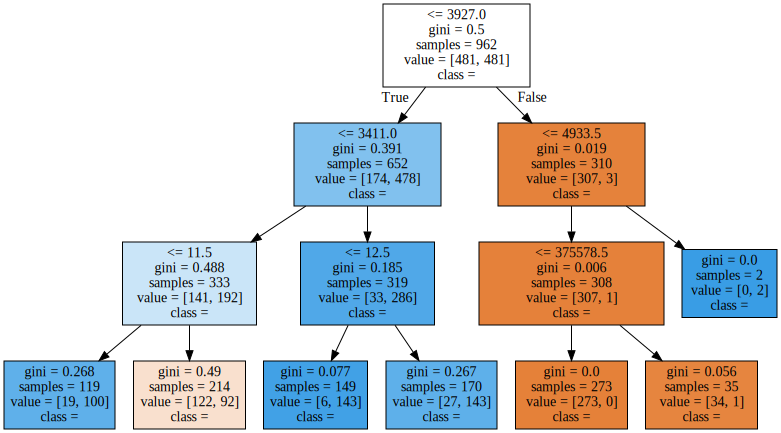

In [6]:
#1. 모듈 및 함수 불러오기
from sklearn.tree import export_graphviz
import graphviz

#2. tree.dot 파일 생성
export_graphviz(model, out_file='tree.dot', class_names= ['비이탈', '이탈'] , \
                feature_names = feature_name, impurity=True, filled=True)
#3. tree.dot 파일 읽기 
with open('tree.dot', encoding = 'utf-8') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### (2) 수치 예측 실습

- 변수 지정 및 전처리

In [7]:
#1. 데이터 불러오기
df = pd.read_csv('Ashopping.csv', encoding = 'cp949')

#2. 변수 지정(독립변수/종속변수)
X = df[df.이탈여부==0][['총매출액', '구매금액대', '1회 평균매출액', '할인권 사용 횟수', '총 할인 금액', '고객등급', '구매유형', '구매카테고리수', '할인민감여부', '성별']]
Y =df[df.이탈여부==0]['평균 구매주기']

#3. 데이터 분할(학습용/평가용 데이터 세트)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

- 모형 학습 및 예측

In [8]:
#1. 모듈 및 함수 불러오기 
from sklearn.tree import DecisionTreeRegressor

#2. 모형 생성 
model = DecisionTreeRegressor(random_state=0, max_depth=6)

#3. 모형 학습 및 예측
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print('평가용 데이터 세트에 대한 예측값\n', Y_pred)

평가용 데이터 세트에 대한 예측값
 [455.64747475 219.52891923 188.43794852 132.12982455 121.98842338
 455.64747475  36.4605307   36.87257686 188.43794852 219.52891923
 235.97570051  52.57351837  74.96853132 219.52891923 400.49652778
 159.47256847 246.68568749 235.97570051 235.97570051 159.47256847
 298.75707848 188.43794852 182.98808089 124.78956387  69.63876479
 246.68568749 298.75707848  76.76466611  81.69969608 219.52891923
 159.47256847 423.55833333 159.47256847 297.         188.43794852
 188.43794852 219.52891923 182.98808089 188.43794852 625.06696428
 186.37920882 124.78956387 135.65359753 124.78956387 101.95083623
 455.64747475  69.63876479 188.43794852 246.68568749 352.19658123
 188.43794852 441.30536165 132.51288327 135.65359753 246.68568749
 219.52891923 352.19658123 296.30798939 186.37920882 101.95083623
 246.68568749 189.4718831  101.95083623 235.97570051 101.95083623
 162.36665117 188.43794852 149.42775149 485.1375      49.21820922
 235.97570051 149.42775149 162.36665117 162.36665117  76

- 모형 평가

In [9]:
print('학습용 데이터 세트 결정계수: {:.3f}'.format(model.score(X_train, Y_train)))
print('평가용 데이터 세트 결정계수: {:.3f}'.format(model.score(X_test, Y_test)))

학습용 데이터 세트 결정계수: 0.933
평가용 데이터 세트 결정계수: 0.740


In [10]:
#1. 모듈 및 함수 불러오기
from sklearn.metrics import mean_squared_error
from math import sqrt

#2. RMSE 계산
rmse= sqrt(mean_squared_error(Y_test, Y_pred))
print('RMSE:{:.3f}'.format(rmse))

RMSE:99.169


- 변수 중요도 출력

In [11]:
feature_name = X.columns
feature_importances = model.feature_importances_
sorted(zip(feature_importances, feature_name), reverse=True)

[(0.46532298995852994, '1회 평균매출액'),
 (0.4624969172850114, '총매출액'),
 (0.0319625523156692, '총 할인 금액'),
 (0.02330782493258377, '구매카테고리수'),
 (0.00933556691023202, '할인민감여부'),
 (0.006059980868302923, '구매유형'),
 (0.0010628868632488922, '고객등급'),
 (0.00045128086642188674, '할인권 사용 횟수'),
 (0.0, '성별'),
 (0.0, '구매금액대')]

- 모형의 시각화

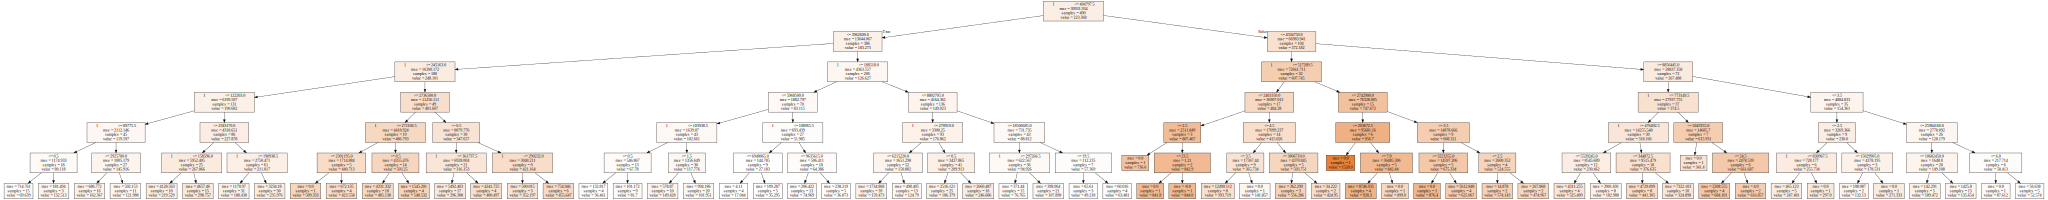

In [12]:
#1. 모듈 및 함수 불러오기
from sklearn.tree import export_graphviz
import graphviz 

#2. tree.dot 파일 생성
export_graphviz(model, out_file='tree.dot',feature_names=feature_name, impurity=True, filled=True)

#3. tree.dot 파일 읽기 
with open('tree.dot', encoding = 'utf-8') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)



### (3) 모형 성능 비교

- 로지스틱 회귀모형 생성

In [13]:
#1. 모듈 및 함수 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#2. 데이터 불러오기
df = pd.read_csv('Ashopping.csv', encoding = 'cp949')

#3. 변수 지정
X1 = df[['총매출액', '거래기간', '방문빈도']]
Y1 = df['이탈여부']

#4. 데이터 분할
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=0)

#5. 표준화 
scaler = StandardScaler()
scaler.fit(X1_train)
X1_test = scaler.transform(X1_test)
X1_train = scaler.transform(X1_train)

#6. 오버 샘플링
X1_train, Y1_train = SMOTE(random_state=0).fit_resample(X1_train, Y1_train)

#7. 모형 학습 및 예측
Logr = LogisticRegression(C = 1, random_state=0)
Logr.fit(X1_train, Y1_train)
Y1_pred = Logr.predict(X1_test) 

- K-최근접 이웃 모형 생성

In [14]:
#1. 모듈 및 함수 불러오기
from sklearn.neighbors import KNeighborsClassifier


#2. 변수 지정
X2 = df[['총매출액', '방문빈도', '1회 평균매출액', '거래기간', '평균 구매주기']]
Y2 = df['이탈여부']

#3. 데이터 분할
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=0)

#4. 오버 샘플링
X2_train, Y2_train = SMOTE(random_state=0).fit_resample(X2_train, Y2_train)


#5. 표준화 
scaler = StandardScaler().fit(X2_train)
X2_test = scaler.transform(X2_test)
X2_train = scaler.transform(X2_train)


#6. 모형 학습 및 예측
kNN = KNeighborsClassifier(n_neighbors=7)
kNN.fit(X2_train, Y2_train) 
Y2_pred = kNN.predict(X2_test) 


- 의사결정나무 모형 생성

In [15]:
#1. 모듈 및 함수 불러오기
from sklearn.tree import DecisionTreeClassifier

#2. 변수 지정 
X3=df[['총매출액', '구매금액대', '할인권 사용 횟수', '총 할인 금액',  
        '구매유형', '구매카테고리수', '성별', '거래기간','방문빈도', '할인민감여부']]
Y3= df['이탈여부']

#3. 데이터 분할
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.3, random_state=0)


#4. 모형 학습 및 예측 
Dtree = DecisionTreeClassifier(random_state=0, max_depth = 3)
Dtree.fit(X3_train, Y3_train)
Y3_pred=Dtree.predict(X3_test)

- ROC 곡선 및 AUC 점수 출력

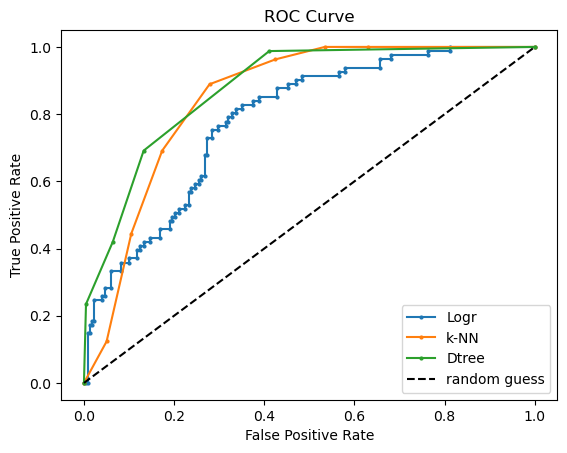

로지스틱 회귀분석 AUC 점수:0.784
k-최근접 이웃 AUC 점수::0.849
의사결정나무 AUC 점수:0.877


In [16]:
#1. 모듈 및 함수 불러오기
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

#2. ROC 곡선 객체 생성
fpr1, tpr1, thresholds = roc_curve(Y1_test, Logr.decision_function(X1_test))
fpr2, tpr2, thresholds  = roc_curve(Y2_test, kNN.predict_proba(X2_test)[:, 1])
fpr3, tpr3, thresholds = roc_curve(Y3_test, Dtree.predict_proba(X3_test)[:, 1])

#3. ROC 곡선 시각화
plt.plot(fpr1, tpr1, 'o-', ms=2, label='Logr')
plt.plot(fpr2, tpr2, 'o-', ms=2, label='k-NN')
plt.plot(fpr3, tpr3, 'o-', ms=2, label='Dtree')
plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#4. AUC 점수 계산
Logr_auc=roc_auc_score(Y1_test, Logr.decision_function(X1_test))
kNN_auc=roc_auc_score(Y2_test, kNN.predict_proba(X2_test)[:, 1])
Dtree_auc=roc_auc_score(Y3_test, Dtree.predict_proba(X3_test)[:, 1])

#5. AUC 점수 출력
print('로지스틱 회귀분석 AUC 점수:{:.3f}'.format(Logr_auc))
print('k-최근접 이웃 AUC 점수::{:.3f}'.format(kNN_auc))
print('의사결정나무 AUC 점수:{:.3f}'.format(Dtree_auc))